# Adult Income Classification - Project Documentation

Project Title: Predicting Income Level (>50K or <=50K) using Census Data

Dataset: UCI Adult Income Dataset (Census Income Data)

## Project Overview

This project aims to build a robust machine learning model to classify whether an individual's income exceeds $50K/year based on census information. The focus is on learning and applying data preprocessing, feature engineering, model comparison, and ensemble learning techniques.

### 🔹 Models Trained & Compared

| Model               | Accuracy | F1-Score (1) | Notes                              |
|---------------------|----------|--------------|------------------------------------|
| Logistic Regression | 0.795    | 0.67         | Baseline, sensitive to scaling     |
| Random Forest       | 0.837    | 0.66         | Good stability, fast               |
| XGBoost             | 0.836    | 0.72         | High recall for income >50K        |
| StackingClassifier  | 0.860    | 0.69         | Best balance across metrics ✨     |

### Data Loading

In [1136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1138]:
df = pd.read_csv("adult.csv")

In [1140]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [1142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Columns:
- age: kişinin yaşı
- workclass: çalışma şekli (özel sektör, devlet,...)
- fnlwgt: ağırlık katsayısı
- education: eğitim seviyesi
- education.num: eğitim seviyesinin sayısal değeri
- marital.status: medeni hali
- ocuppation: meslek
- relationship: aile içindeki pozisyonu
- race: ırk
- sex: cinsiyet
- capital.gain: sermaye kazancı(yatırım gelirleri)
- capital.loss: sermaye kaybı
- hours.per.week: haftalık çalışma süresi
- native.country: doğduğu ülke
- income: yıllık gelir 50k dan fazla mı?(hedef sütun)

In [1145]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [1147]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [1149]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Examining The Target Variable

In [1152]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='count'>

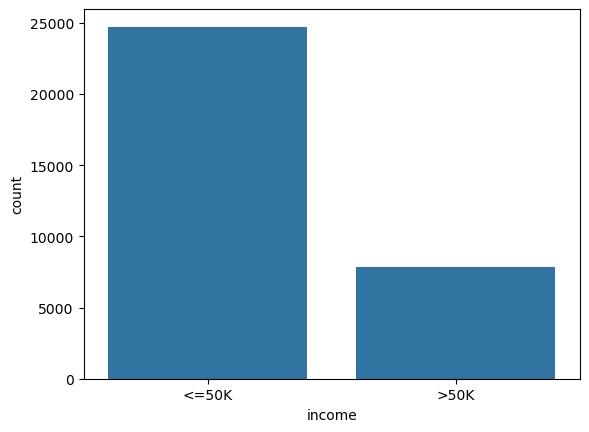

In [1154]:
df['income'].value_counts(normalize=True) 
sns.countplot(x='income', data=df)   

### Examining Numerical Variables

In [1157]:
for col in ['age', 'hours.per.week', 'capital.gain', 'capital.loss']:
    print(f"{col}:\n", df[col].value_counts(), "\n")

age:
 age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64 

hours.per.week:
 hours.per.week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
94        1
82        1
92        1
87        1
74        1
Name: count, Length: 94, dtype: int64 

capital.gain:
 capital.gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
4931         1
7978         1
5060         1
2538         1
Name: count, Length: 119, dtype: int64 

capital.loss:
 capital.loss
0       31042
1902      202
1977      168
1887      159
1485       51
        ...  
2201        1
2163        1
1944        1
1539        1
2472        1
Name: count, Length: 92, dtype: int64 



<Axes: title={'center': 'hours.per.week'}>

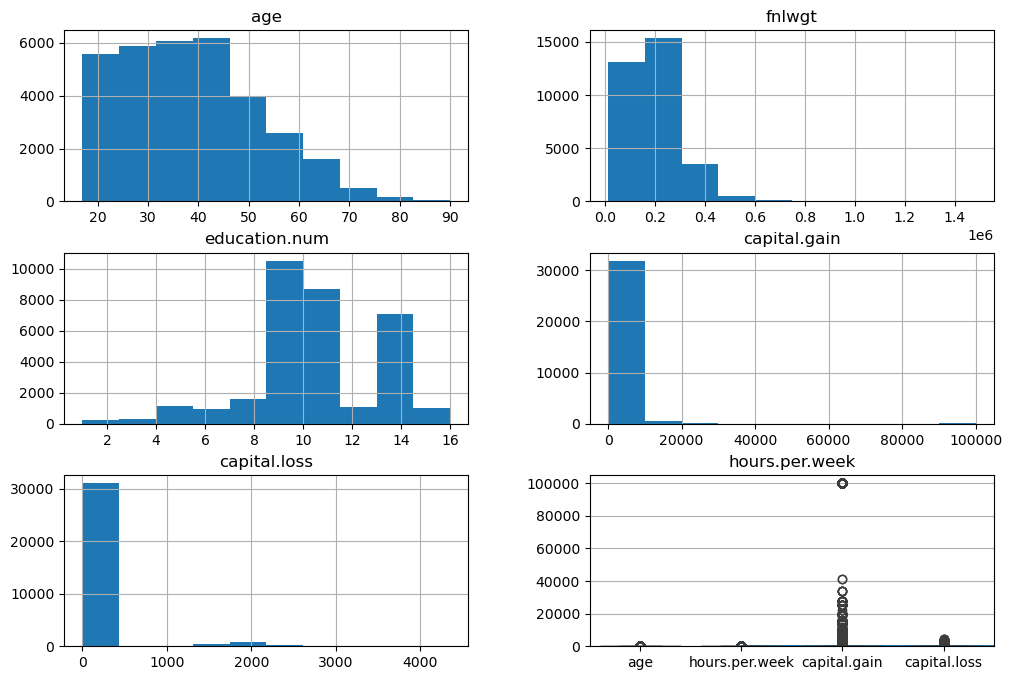

In [1159]:
df.describe()                              # Ort., min, max, std
df.hist(figsize=(12, 8))                   # Tüm sayısal kolonların histogramları
sns.boxplot(data=df[['age', 'hours.per.week', 'capital.gain', 'capital.loss']])

### Analysis of Categorical Variables

In [1161]:
categorical = df.select_dtypes(include='object').columns

In [1163]:
for col in categorical:
    print(f"{col}:\n", df[col].value_counts(), "\n")

workclass:
 workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64 

education:
 education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64 

marital.status:
 marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64 

occupation:
 occupation
Prof-specialt

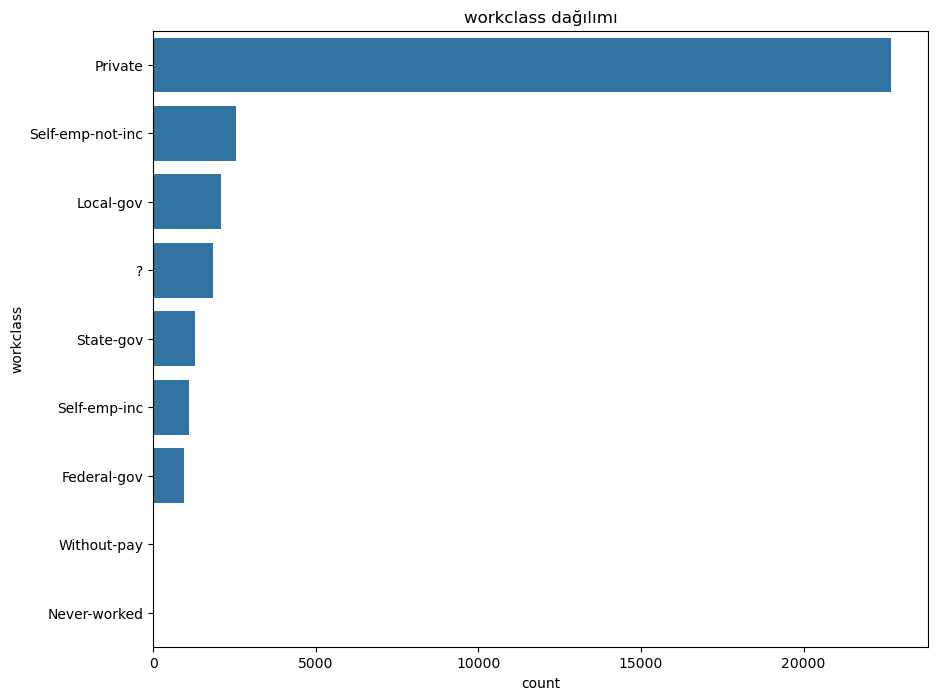

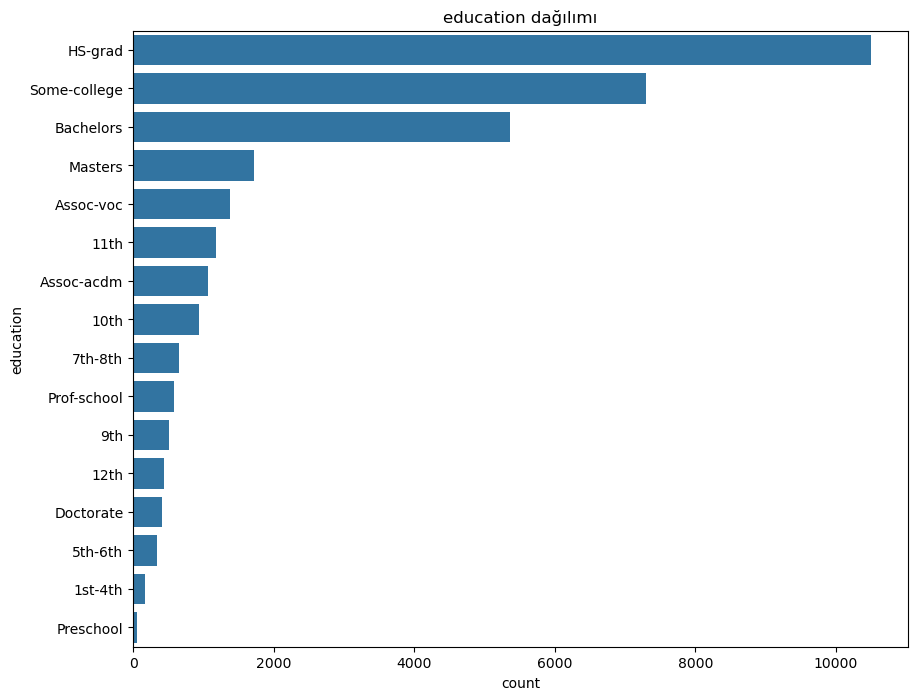

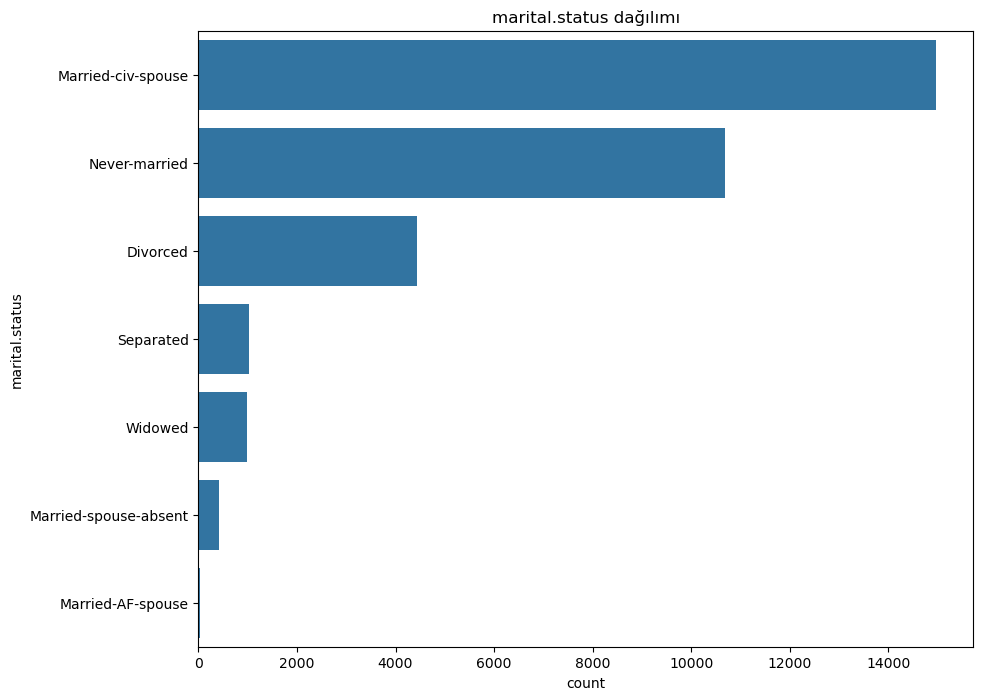

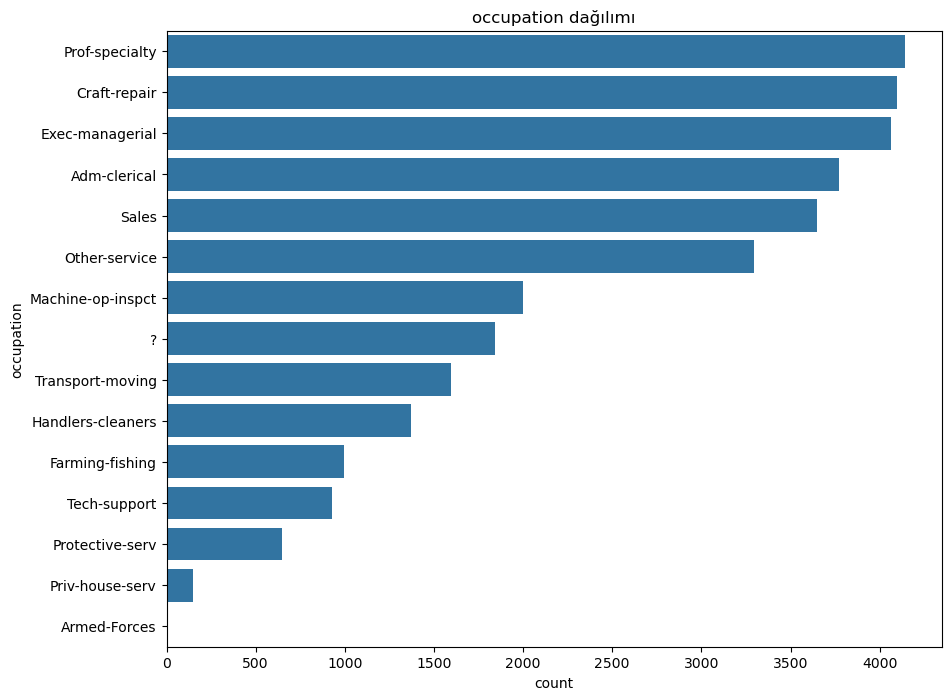

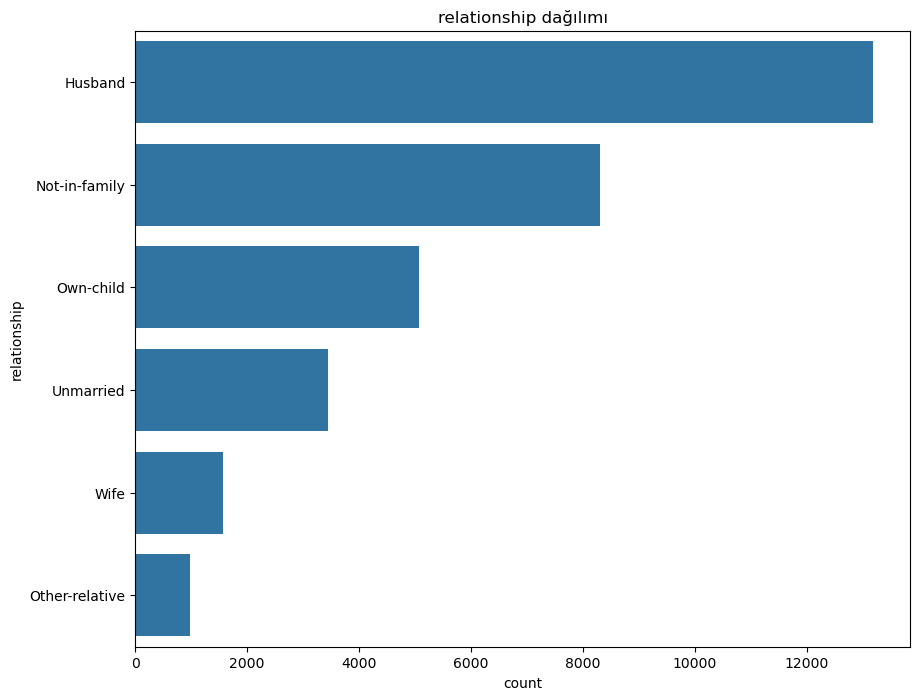

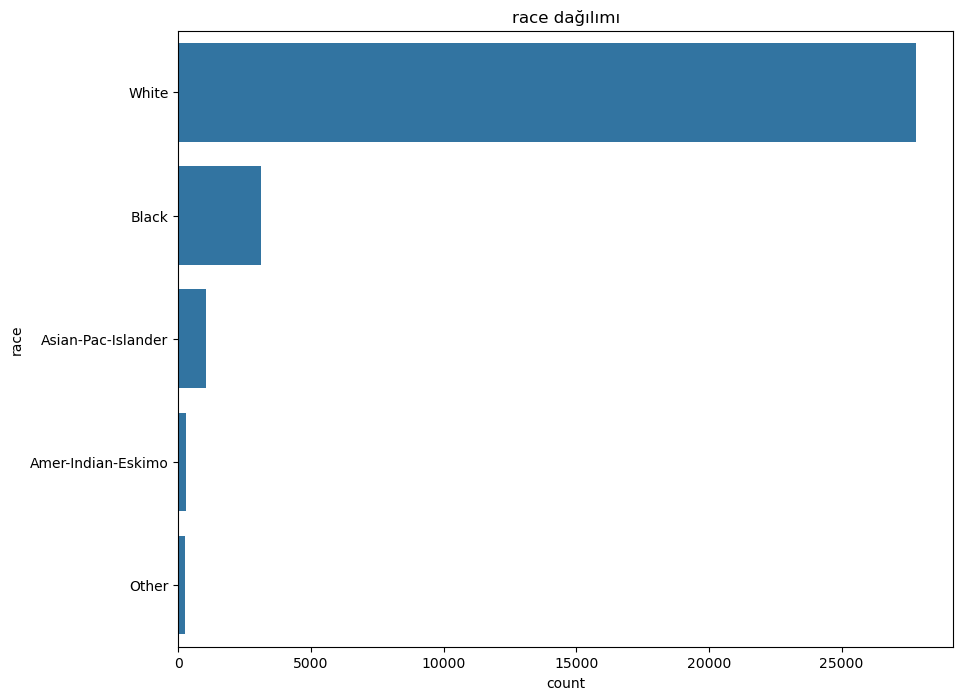

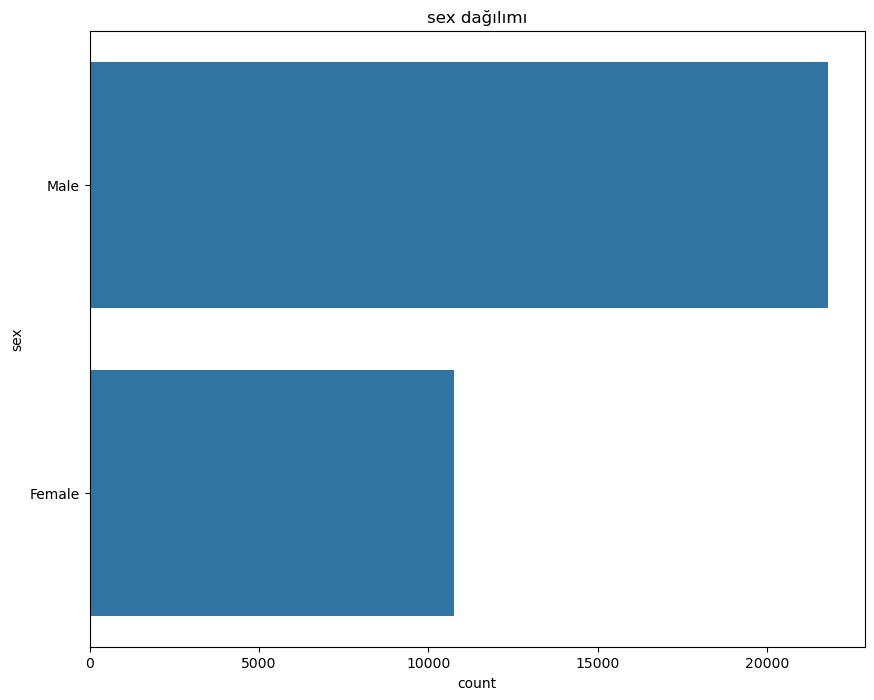

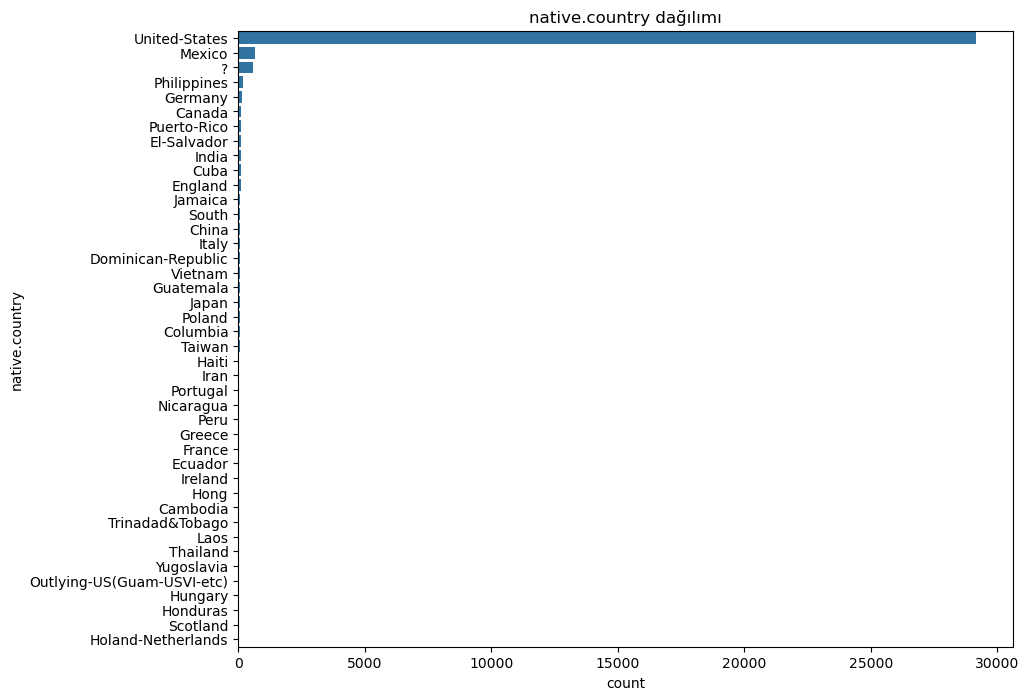

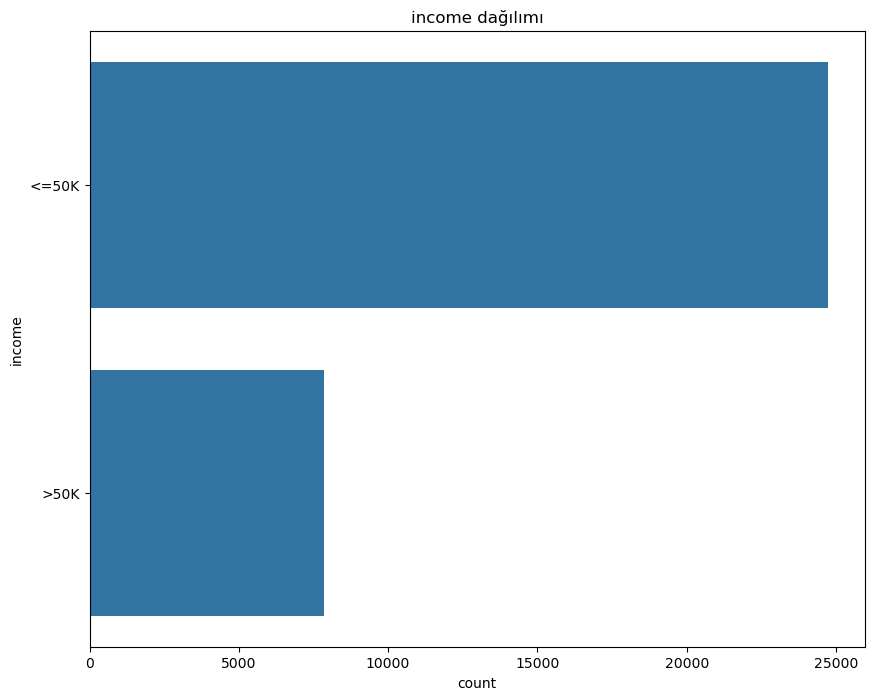

In [1166]:
for col in categorical:
    plt.figure(figsize=(10, 8))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"{col} dağılımı")
    plt.show()

### Detection of Missing and Problematic Data:

In [1168]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [1169]:
df.replace("?", np.nan, inplace=True)

In [1170]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

### Identifying Outliers:

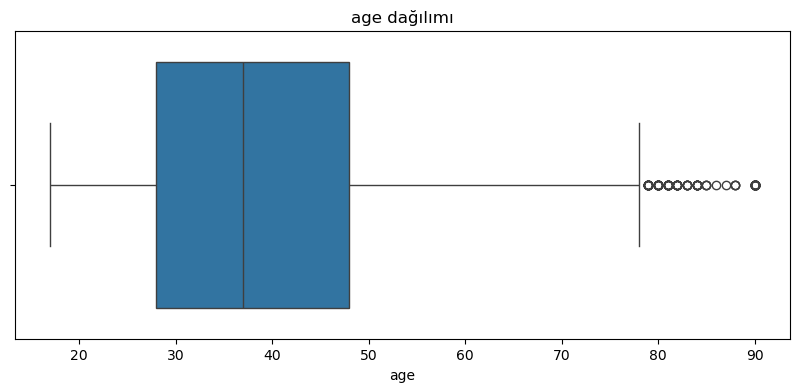

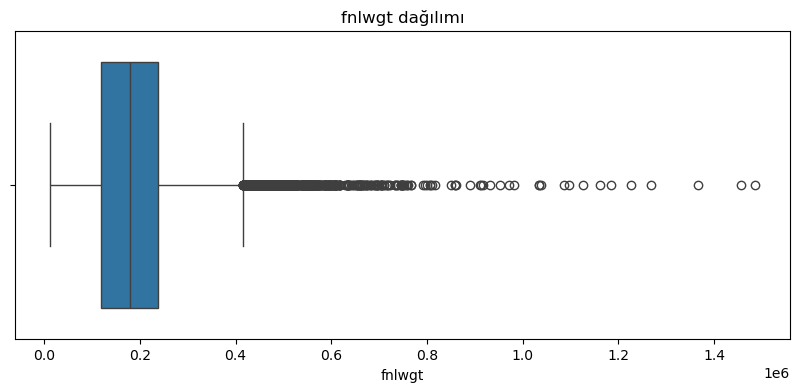

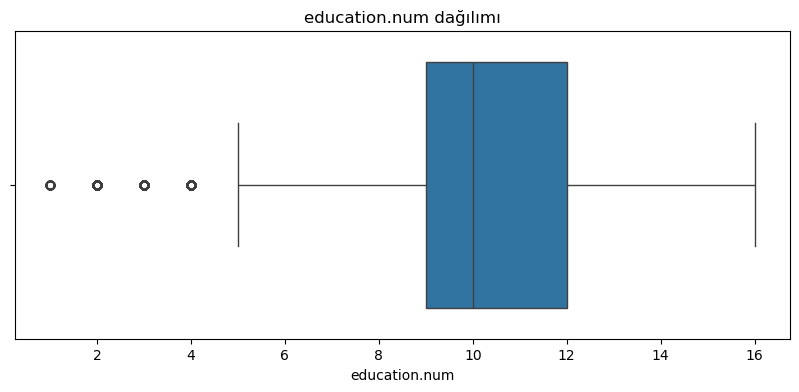

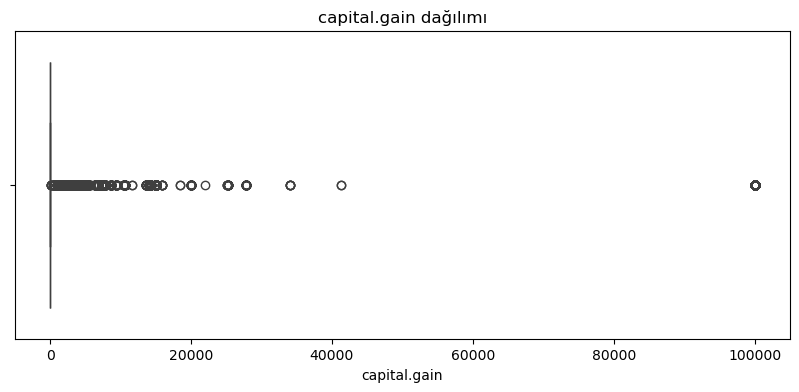

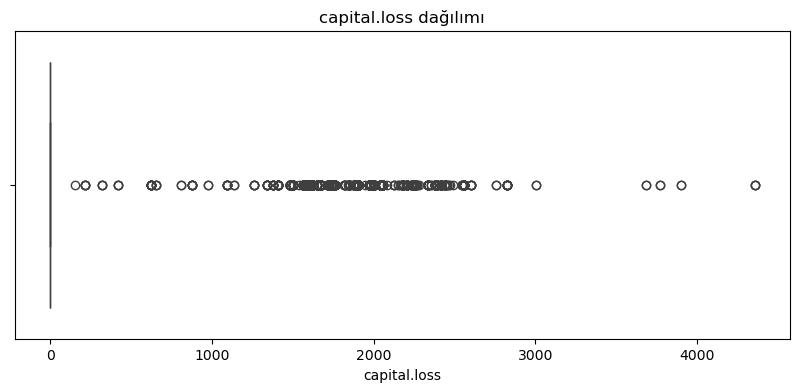

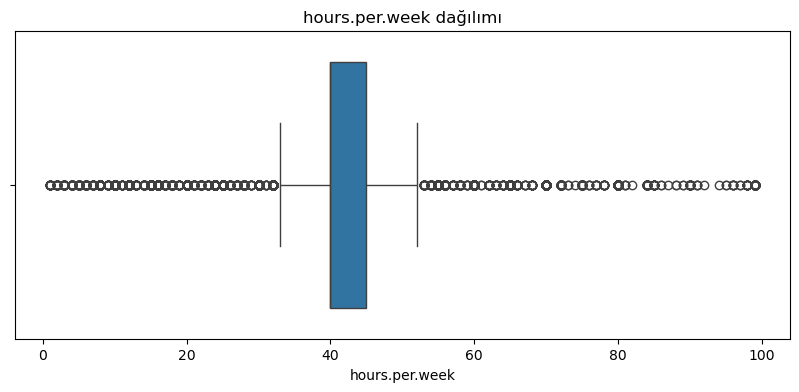

In [1176]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} dağılımı")
    plt.show()

### Correlation Analysis:

<Axes: >

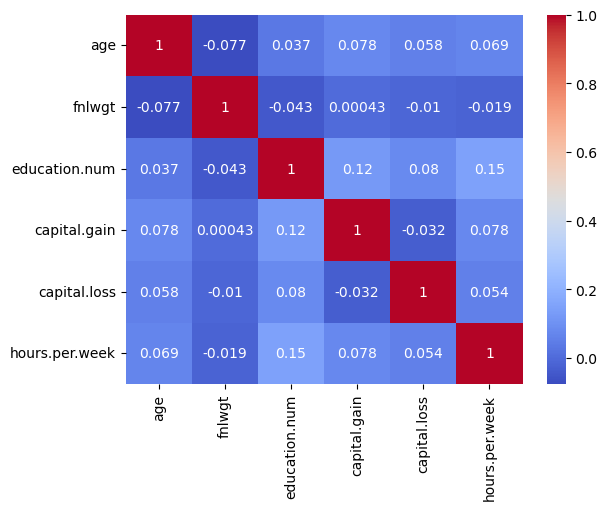

In [1178]:
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

### Encoding Plan:

In [1181]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


In [1184]:
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} kategori")

workclass: 8 kategori
education: 16 kategori
marital.status: 7 kategori
occupation: 14 kategori
relationship: 6 kategori
race: 5 kategori
sex: 2 kategori
native.country: 41 kategori
income: 2 kategori


### Cleaning Missing Values:

In [1187]:
df.dropna(subset=['workclass', 'occupation', 'native.country'], inplace=True)

In [1189]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### Encoding Operations:

We can do encoding in 9 columns. workclass, education, marital.status, occupation, relationship, race, sex, native_country, income

In [1193]:
continent_map = {
    'United-States': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    'Puerto-Rico': 'North America', 'Honduras': 'North America', 'Jamaica': 'North America',
    'Cuba': 'North America',

    'Germany': 'Europe', 'England': 'Europe', 'France': 'Europe', 'Italy': 'Europe',
    'Greece': 'Europe', 'Ireland': 'Europe', 'Poland': 'Europe', 'Portugal': 'Europe',
    'Scotland': 'Europe', 'Hungary': 'Europe', 'Holand-Netherlands': 'Europe',

    'India': 'Asia', 'China': 'Asia', 'Japan': 'Asia', 'Iran': 'Asia',
    'Philippines': 'Asia', 'Vietnam': 'Asia', 'Cambodia': 'Asia', 'Thailand': 'Asia',
    'Hong': 'Asia', 'Laos': 'Asia', 'Taiwan': 'Asia',

    'Columbia': 'South America', 'Ecuador': 'South America',
    'Peru': 'South America', 'El-Salvador': 'South America',
    'Guatemala': 'South America', 'Nicaragua': 'South America',
    'Trinadad&Tobago': 'South America',

    'South-Africa': 'Africa', 'Egypt': 'Africa',

    'Yugoslavia': 'Other', 'Outlying-US(Guam-USVI-etc)': 'Other',
    'Haiti': 'Other', '?': 'Other'
}


df['continent'] = df['native.country'].map(continent_map)



In [1195]:
df = pd.get_dummies(df, columns=['continent'], drop_first=True)

In [1197]:
df.drop('native.country', axis=1, inplace=True)

In [1199]:
education_order = {
    'Preschool': 1,
    '1st-4th': 2,
    '5th-6th': 3,
    '7th-8th': 4,
    '9th': 5,
    '10th': 6,
    '11th': 7,
    '12th': 8,
    'HS-grad': 9,
    'Some-college': 10,
    'Assoc-voc': 11,
    'Assoc-acdm': 12,
    'Bachelors': 13,
    'Masters': 14,
    'Prof-school': 15,
    'Doctorate': 16
}

df['education'] = df['education'].map(education_order)

In [1201]:
df.drop('education.num', axis=1, inplace=True)

In [1203]:
df = pd.get_dummies(df, columns=
                    ['workclass',
                    'marital.status',
                    'occupation',
                    'relationship',
                    'race'
                    ], drop_first=True)
                    

In [1205]:
df.head()

,age,fnlwgt,education,sex,capital.gain,capital.loss,hours.per.week,income,continent_Europe,continent_North America,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
1,82,132870,9,Female,0,4356,18,<=50K,False,True,...,False,True,False,False,False,False,False,False,False,True
3,54,140359,4,Female,0,3900,40,<=50K,False,True,...,False,False,False,False,True,False,False,False,False,True
4,41,264663,10,Female,0,3900,40,<=50K,False,True,...,False,False,False,True,False,False,False,False,False,True
5,34,216864,9,Female,0,3770,45,<=50K,False,True,...,False,False,False,False,True,False,False,False,False,True
6,38,150601,6,Male,0,3770,40,<=50K,False,True,...,False,False,False,False,True,False,False,False,False,True


In [1207]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['income'] = le.fit_transform(df['income'])

In [1209]:
df.head()

,age,fnlwgt,education,sex,capital.gain,capital.loss,hours.per.week,income,continent_Europe,continent_North America,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
1,82,132870,9,0,0,4356,18,0,False,True,...,False,True,False,False,False,False,False,False,False,True
3,54,140359,4,0,0,3900,40,0,False,True,...,False,False,False,False,True,False,False,False,False,True
4,41,264663,10,0,0,3900,40,0,False,True,...,False,False,False,True,False,False,False,False,False,True
5,34,216864,9,0,0,3770,45,0,False,True,...,False,False,False,False,True,False,False,False,False,True
6,38,150601,6,1,0,3770,40,0,False,True,...,False,False,False,False,True,False,False,False,False,True


### Pre-training Check:

In [1212]:
df.isnull().sum().sum()

0

In [1214]:
df.dtypes.value_counts()

bool     38
int64     8
Name: count, dtype: int64

In [1216]:
df.nunique().sort_values()

marital.status_Separated                    2
occupation_Craft-repair                     2
occupation_Exec-managerial                  2
occupation_Farming-fishing                  2
occupation_Handlers-cleaners                2
occupation_Machine-op-inspct                2
occupation_Other-service                    2
occupation_Priv-house-serv                  2
occupation_Prof-specialty                   2
occupation_Protective-serv                  2
occupation_Sales                            2
occupation_Tech-support                     2
occupation_Transport-moving                 2
relationship_Not-in-family                  2
relationship_Other-relative                 2
relationship_Own-child                      2
relationship_Unmarried                      2
relationship_Wife                           2
race_Asian-Pac-Islander                     2
race_Black                                  2
occupation_Armed-Forces                     2
marital.status_Widowed            

In [1218]:
df.drop('fnlwgt', axis=1, inplace=True)

In [1220]:
df['capital.gain'] = df['capital.gain'].apply(lambda x: np.log1p(x))
df['capital.loss'] = df['capital.loss'].apply(lambda x: np.log1p(x))

### Splitting the Dataset

In [1223]:
from sklearn.model_selection import train_test_split
x= df.drop('income', axis=1)
y= df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1225]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print('Classification Report', classification_report(y_test, y_pred))

Accuracy 0.8342449859108239
Classification Report               precision    recall  f1-score   support

           0       0.87      0.92      0.89      4533
           1       0.70      0.59      0.64      1500

    accuracy                           0.83      6033
   macro avg       0.78      0.75      0.77      6033
weighted avg       0.83      0.83      0.83      6033



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Standardizing Data:

In [1227]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [1228]:
y_pred = model.predict(X_test_scaled)
print("Accuracy", accuracy_score(y_test, y_pred))
print('Classification Report', classification_report(y_test, y_pred))

Accuracy 0.7951268025857782
Classification Report               precision    recall  f1-score   support

           0       0.93      0.78      0.85      4533
           1       0.56      0.83      0.67      1500

    accuracy                           0.80      6033
   macro avg       0.75      0.81      0.76      6033
weighted avg       0.84      0.80      0.81      6033



### RandomForestClassifier

In [1230]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Accuracy", accuracy_score(y_test, y_pred_rf))
print('Classification Report', classification_report(y_test, y_pred_rf))

Accuracy 0.8370628211503398
Classification Report               precision    recall  f1-score   support

           0       0.88      0.91      0.89      4533
           1       0.69      0.63      0.66      1500

    accuracy                           0.84      6033
   macro avg       0.78      0.77      0.78      6033
weighted avg       0.83      0.84      0.83      6033



In [1231]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1])))
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print("Accuracy", accuracy_score(y_test, y_pred_xgb))
print('Classification Report', classification_report(y_test, y_pred_xgb))

Accuracy 0.8362340460798939
Classification Report               precision    recall  f1-score   support

           0       0.94      0.83      0.88      4533
           1       0.63      0.85      0.72      1500

    accuracy                           0.84      6033
   macro avg       0.78      0.84      0.80      6033
weighted avg       0.86      0.84      0.84      6033



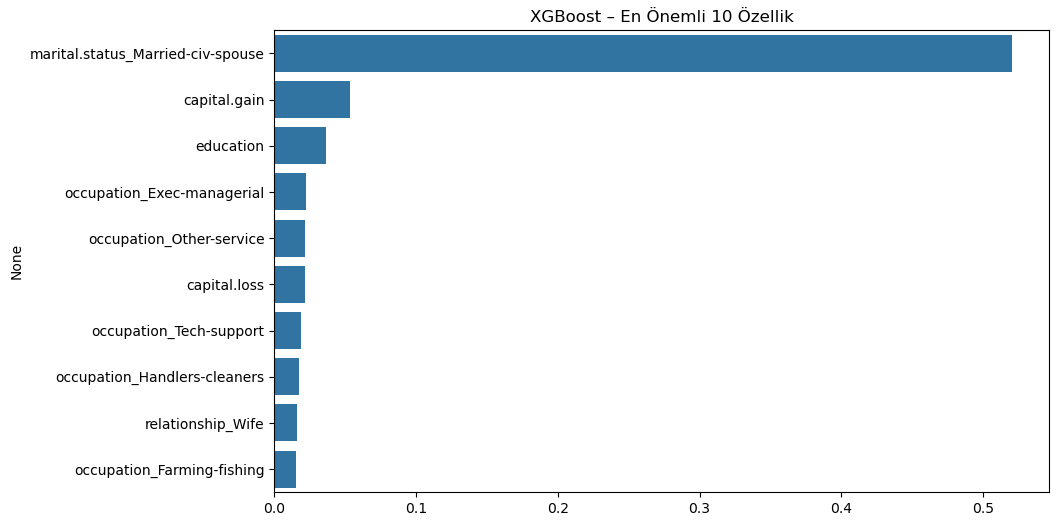

In [1232]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

importances = xgb.feature_importances_
features = pd.Series(importances, index=x.columns)
top_features = features.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("XGBoost – En Önemli 10 Özellik")
plt.show()

### FStackingClassifier

In [1236]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(
    estimators=[
        ('rf',RandomForestClassifier()),
        ('xgb', XGBClassifier())
    ], final_estimator=LogisticRegression()
)
stack.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression())

In [1238]:
y_pred_Stacking = stack.predict(X_test_scaled)

print("Accuracy", accuracy_score(y_test, y_pred_Stacking))
print('Classification Report', classification_report(y_test, y_pred_Stacking))

Accuracy 0.8614288082214487
Classification Report               precision    recall  f1-score   support

           0       0.89      0.94      0.91      4533
           1       0.77      0.64      0.70      1500

    accuracy                           0.86      6033
   macro avg       0.83      0.79      0.80      6033
weighted avg       0.86      0.86      0.86      6033

